# Visualizando a variação do valor do fechamento em relação ao anterior

In [3]:
def voltare(acao, periodo = 7):
    
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas_datareader as pdr
    import datetime
    import math
    import warnings
    warnings.filterwarnings("ignore")
    
    def get(ticker, startdata, enddate):
        return pdr.get_data_yahoo(ticker, start=startdata, end=enddate)

    all_data = get(f'{acao.upper()}',  datetime.datetime(2006, 10, 1), datetime.datetime(2021, 1, 1))


    all_data['Return'] = 100 * (all_data.Close.pct_change())
    std_daily = all_data.Return.std()


    fig, ax = plt.subplots(figsize = (32,9))
    ax.plot(all_data['Return'], color = 'tomato', label = 'Retornos diários')





    def annot_max(x,y, ax=None):
        xmax = x[np.argmax(y)]
        ymax = y.max()
        text= "{:.3f}".format(xmax)
        if not ax:
            ax=plt.gca()
        bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
        arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
        kw = dict(xycoords='data',textcoords="axes fraction",
                  arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
        ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

    tempo = periodo   

    #annot_max(all_data.index, all_data['Return'])    
    for i in range(len(all_data[(all_data.Return >= math.sqrt(tempo) * std_daily) | (all_data.Return <= -1*(math.sqrt(tempo) * std_daily))].Return)):
        ax.annotate(str(all_data[(all_data.Return >= math.sqrt(tempo) * std_daily) | (all_data.Return <= -1*(math.sqrt(tempo) * std_daily))].Return.index[i].to_period("d")),
                    xy = (all_data[(all_data.Return >= math.sqrt(tempo) * std_daily) | (all_data.Return <= -1*(math.sqrt(tempo) * std_daily))].index[i],
                          all_data[(all_data.Return >= math.sqrt(tempo) * std_daily) | (all_data.Return <= -1*(math.sqrt(tempo) * std_daily))].Return[i]*1.05),
                    va = 'bottom', ha = 'center')
    return plt.show()

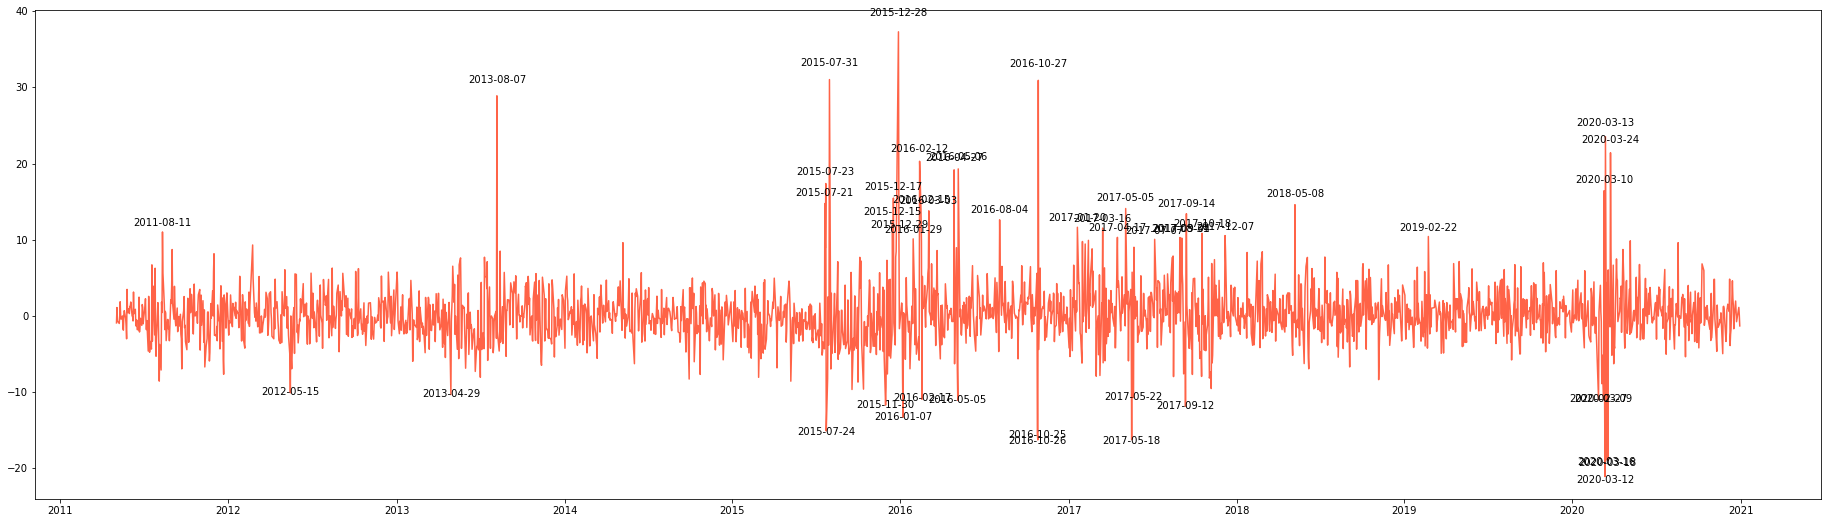

In [4]:
voltare("MGLU3.SA")

In [ ]:
all_data[(all_data.Return >= math.sqrt(tempo) * std_daily) | (all_data.Return <= -1*(math.sqrt(tempo) * std_daily))].sort_values('Return')